# Question 2-1

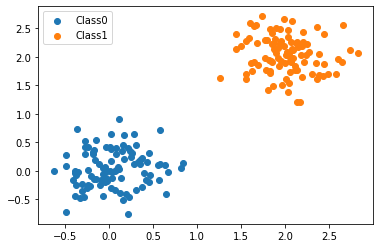

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
mean1 = [0, 0]
cov1 = [[0.09, 0], [0, 0.09]] 
x1= np.random.multivariate_normal(mean1, cov1, 100)
mean2 = [2, 2]
cov2 = [[0.09, 0], [0, 0.09]]
x2 = np.random.multivariate_normal(mean2, cov2, 100)
x_train= np.vstack([x1,x2])
y_train =[1 for i in range(100)] +[-1 for i in range(100)]
plt.scatter(x1[:,0],x1[:,1], label = "Class0")
plt.scatter(x2[:,0],x2[:,1], label = "Class1")
plt.legend()
plt.show()

In [3]:
class AdaptiveLinearNeuron(object):
    
   def __init__(self, rate = 0.01, niter = 10):
      self.rate = rate
      self.niter = niter

   def fit(self, X, y):
   
      self.weight = np.zeros(1 + X.shape[1])

      self.errors = []

      self.cost = []

      for i in range(self.niter):
        cost=0
        for i,x in enumerate(X):
             output = self.net_input(x)
             errors = y[i] - output
             self.weight[1:] += self.rate * x.T.dot(errors)
             self.weight[0] += self.rate * errors.sum()
             cost = cost+((errors**2).sum() / 2.0)
        self.cost.append(cost)
      return self

   def net_input(self, X):
        
      return np.dot(X, self.weight[1:]) + self.weight[0]

   def activation(self, X):
     
      return self.net_input(X)

   def predict(self, X):
     
      return np.where(self.activation(X) >= 0.0, 1, -1)




In [4]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
   

   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])
   
   x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
      alpha=0.8, c=cmap(idx), label=cl)

In [5]:
aln = AdaptiveLinearNeuron(0.01, 20)
aln.fit(x_train,y_train)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


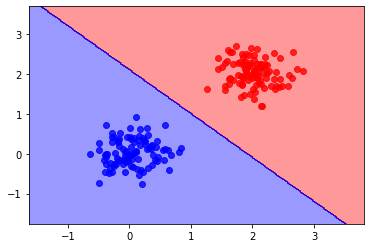

In [6]:
plot_decision_regions(x_train, y_train, classifier=aln)

In [16]:
aln.weight

array([ 0.92645452, -0.44545416, -0.52593789])

# Question 2-2

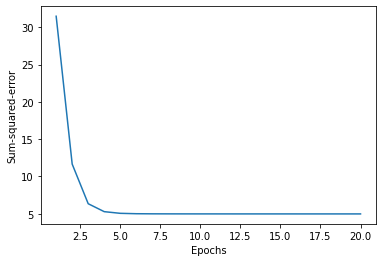

In [7]:
plt.plot(range(1, len(aln.cost) + 1), aln.cost)
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

# Question 2-3

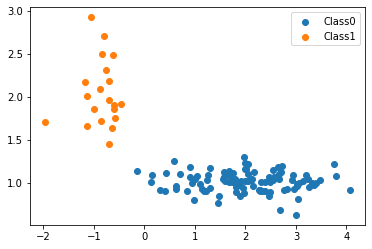

In [12]:
mean1 = [2, 1]
cov1 = [[1, 0], [0, .01]] 
x1= np.random.multivariate_normal(mean1, cov1, 100)
mean2 = [-1, 2]
cov2 = [[0.16, 0], [0, 0.16]]
x2 = np.random.multivariate_normal(mean2, cov2, 20)
x_train=np.vstack([x1,x2])
y_train =[1 for i in range(100)] +[-1 for i in range(20)]
plt.scatter(x1[:,0],x1[:,1], label = "Class0")
plt.scatter(x2[:,0],x2[:,1], label = "Class1")
plt.legend()
plt.show()

In [9]:
aln1 = AdaptiveLinearNeuron(0.01, 20)
aln1.fit(x_train,y_train)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


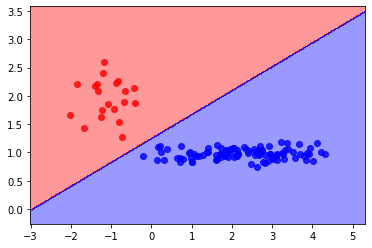

In [10]:
plot_decision_regions(x_train, y_train, classifier=aln1)

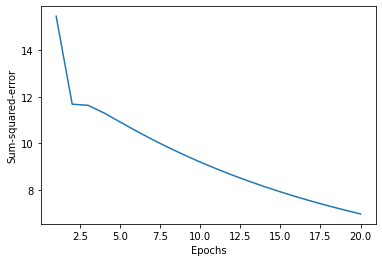

In [11]:
plt.plot(range(1, len(aln1.cost) + 1), aln1.cost)
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()